# ポリシリアル相関係数

**ポリシリアル相関係数（polyserial correlation）** は順序尺度の変数と連続変数の間の相関係数。


## 理論

### モデルの仮定

順序尺度の変数$Y$は連続潜在変数$Y^*$をある閾値で分割したものであると仮定する

$$
Y= y_j \quad \text { if } ~ \tau_{j-1}<Y^* \leq \tau_j
, \quad j = 1, 2, \dots, J
$$

ここで

- $Y^*$ ：連続潜在変数。標準正規分布に従う：$\operatorname{E}[Y] = 0, \operatorname{Var}[Y] = 1$
- $X$ ：連続観測変数。$\operatorname{E}[X] = \mu_X, \operatorname{Var}[X] = \sigma_X$
- $(X, Y^*)$ は 2変量正規分布に従うと仮定：

$$
\left[\begin{array}{c}
X \\
Y^*
\end{array}\right] \sim \mathcal{N}\left(\left[\begin{array}{l}
\mu_X \\
0
\end{array}\right],\left[\begin{array}{ll}
\sigma_X^2 & \rho \\
\rho & 1
\end{array}\right]\right)
$$


### 尤度関数

$n$個のサンプル$(x_i, y_i)$の尤度関数$L$は、正規分布をもちいて

$$
L = \prod_{i=1}^n f_{XY}(x_i, y_i)
= \prod_{i=1}^n f_{X}(x_i) P(Y=y_i \mid X=x_i)
$$

と、同時確率密度 $f_{XY}$ を周辺密度$f_{X}$と条件付き確率密度$f_{Y\mid X}(Y\mid X) = P(Y=y_i \mid X=x_i)$の積の形に変形できる。そして$\rho$が関わるのは条件付き確率密度のほうになる。


$Y$の$X=x_i$による条件つき分布$P(Y=y_i \mid X=x_i)$は、$x_i$を標準化した$z_i =(x_i - \mu_X) / \sigma_X$を考えると 平均$\rho z_i$、分散$(1- \rho)$の正規分布に従うため

$$
P(Y = y_j \mid X = x_i) = \Phi(\tau_j^*) - \Phi(\tau_{j-1}^*), \quad j = 1, 2, \dots, J
$$

ここで$\tau_j^*$は正規化した閾値（標準正規空間での閾値）

$$
\tau_j^* = \frac{\tau_j-\rho z_i}{\sqrt{1-\rho^2}}
$$

である。

こうして対数尤度関数

$$
\log L(\rho)=\sum_{i=1}^n \log \left[\Phi\left(\frac{\tau_{y_i}-\rho z_i}{\sqrt{1-\rho^2}}\right)-\Phi\left(\frac{\tau_{y_i-1}-\rho z_i}{\sqrt{1-\rho^2}}\right)\right]
$$

を構築できる。


:::{dropdown} 条件付き分布について

2変量正規分布：

$$
\left[\begin{array}{c}
X \\
Y
\end{array}\right] \sim \mathcal{N}\left(\left[\begin{array}{l}
\mu_X \\
\mu_Y
\end{array}\right],\left[\begin{array}{cc}
\sigma_X^2 & \rho \sigma_X \sigma_Y \\
\rho \sigma_X \sigma_Y & \sigma_Y^2
\end{array}\right]\right)
$$

があるとき，$X=x$ という条件のもとでの $Y$ の条件付き分布は $f_{Y\mid X}(y|x) = \frac{f_{X,Y}(x,y)}{f_X(x)}$ より、

$$
f_{Y \mid X}(y \mid x)=\frac{1}{\sqrt{2 \pi (1-\rho^2) \sigma_Y^2}} 
\times \exp \left[-\frac{1}{2\left(1-\rho^2\right) \sigma_Y^2}\left\{y-\mu_Y-\rho \frac{\sigma_Y}{\sigma_X}\left(x-\mu_X\right)\right\}^2\right]
$$

から、条件付き分布は

$$
Y \mid X = x \sim 
\mathcal{N}\left(
\mu_Y + \rho \frac{\sigma_Y}{\sigma_X} (x-\mu_X), (1-\rho^2) \sigma_Y^2
\right)
$$

となる。$\mu_Y=0, \sigma_Y=1$の

$$
\left[\begin{array}{c}
X \\
Y^*
\end{array}\right] \sim \mathcal{N}\left(\left[\begin{array}{l}
\mu_X \\
0
\end{array}\right],\left[\begin{array}{cc}
\sigma_X^2 & \rho \sigma_X \\
\rho \sigma_X & 1
\end{array}\right]\right)
$$

という分布であれば

$$
Y^* \mid X = x \sim 
\mathcal{N}\left(
\rho \frac{1}{\sigma_X} (x-\mu_X), 1-\rho^2
\right)
$$

となる。$X$を標準化して $z_i = (x_i - \mu_X) / \sigma_X$ とおけば

$$
Y^* \mid Z = z_i \sim \mathcal{N}\left(\rho z_i, 1-\rho^2\right)
$$



参考：

- [Multivariate normal distribution - Wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case_2)
- 藤越康祝, 若木宏文, & 柳原宏和. (2011). 確率・統計の数学的基礎.

:::

:::{card} 関連文献

- Drasgow, F. (1986). Polychoric and polyserial correlations In: Kotz S, Johnson N, editors. The Encyclopedia of Statistics.

:::

In [23]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar

def normalize_ordinal(x: np.ndarray[int]) -> np.ndarray[int]:
    """Normalize ordinal variable to be integer-coded starting from 0."""
    unique_values = np.unique(x)
    value_to_code = {value: code for code, value in enumerate(unique_values)}
    return np.vectorize(value_to_code.get)(x)

def polyserial_correlation(x: np.ndarray, y: np.ndarray) -> float:
    """
    Estimate the polyserial correlation coefficient between a continuous variable x
    and an ordinal variable y using maximum likelihood estimation.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    if not np.issubdtype(y.dtype, np.integer):
        raise ValueError("y must be an integer-coded ordinal variable.")

    # Standardize x
    z = (x - np.mean(x)) / np.std(x)

    # Estimate thresholds τ from y
    def estimate_thresholds(y):
        levels = np.sort(np.unique(y))
        thresholds = []
        for level in levels[:-1]:  # exclude top category
            p = np.mean(y <= level)
            thresholds.append(norm.ppf(p))
        return np.concatenate(([-np.inf], thresholds, [np.inf]))

    y = normalize_ordinal(y)
    tau = estimate_thresholds(y)

    def neg_log_likelihood(rho):
        log_likelihood = 0.0
        for i in range(len(z)):
            j = y[i]
            tau_lower = (tau[j] - rho * z[i]) / np.sqrt(1 - rho**2)
            tau_upper = (tau[j + 1] - rho * z[i]) / np.sqrt(1 - rho**2)
            p_i = norm.cdf(tau_upper) - norm.cdf(tau_lower)
            p_i = max(p_i, 1e-6)  # soft clipping
            if np.isnan(p_i):
                continue
            log_likelihood += np.log(p_i)
        return -log_likelihood
    
    result = minimize_scalar(neg_log_likelihood, bounds=(-0.999, 0.999), method='bounded')
    
    
    # plot for debug
    rho_range = np.linspace(-0.999, 0.999, 200)
    likelihoods = np.array([neg_log_likelihood(rho) for rho in rho_range])
    rho_hat = rho_range[np.argmin(likelihoods)]
    
    fig, ax = plt.subplots(figsize=[4,3])
    ax.plot(rho_range, likelihoods, color="dimgray")
    ax.set(xlabel=r"$\rho$", ylabel="log likelihood", title="Maximum Likelihood Estimate")
    l = likelihoods[~np.isinf(likelihoods)]
    # y = -(l.max() - l.min()) / 2
    y = np.min(likelihoods)
    ax.text(rho_hat * 1.1, y * 1.5, r"$\hat{\rho}$"+f"={rho_hat:.3f}", color="steelblue")
    ax.axvline(rho_hat, color="steelblue")
    fig.show()

    return result.x

0.7481134651912188

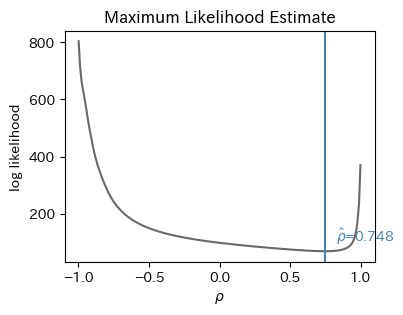

In [24]:
rho = 0.75
Cov = np.array([[1, rho], [rho, 1]])
X = multivariate_normal.rvs(mean=mean, cov=Cov, size=n, random_state=0)
df = pd.DataFrame(X, columns=["x", "y"])
df["y"], _ = pd.cut(df["y"], bins=3).factorize(sort=True)
polyserial_correlation(df["x"], df["y"])